In [1]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
path = 'data/crime_astros_finalB.csv'

df = pd.read_csv(path)
df.drop(['date'],axis=1,inplace=True)
df.head()

,crime_total,weekday,month,year,dist_stadium_meadian,season,part_day_mode,hour_mode,premise_mode,offense_mode,game
0,16,Friday,Jan,2010,0.499216,Winter,Night,0,bar_nc,Theft,No Game
1,12,Saturday,Jan,2010,0.575038,Winter,Night,14,street,Theft,No Game
2,10,Sunday,Jan,2010,0.493969,Winter,Night,0,street,Theft,No Game
3,5,Monday,Jan,2010,0.648818,Winter,Afternoon,14,store,Theft,No Game
4,7,Tuesday,Jan,2010,0.706555,Winter,Morning,6,comm bld,Theft,No Game


In [ ]:
print(list(df.columns))

In [3]:
# df = df[[ 'crime_total', 'weekday', 'month', 'season', 'part_day_mode', 'premise_mode', 'game']]
dr = df[[ 'crime_total','weekday','part_day_mode']]

In [4]:
dd = pd.get_dummies(df,drop_first=True)
dd.head()

,crime_total,year,dist_stadium_meadian,hour_mode,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,...,premise_mode_university college,premise_mode_unk,premise_mode_warehouse,offense_mode_Auto Theft,offense_mode_Burglary,offense_mode_Rape,offense_mode_Robbery,offense_mode_Theft,game_No Game,game_Won Game
0,16,2010,0.499216,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,12,2010,0.575038,14,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,10,2010,0.493969,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,5,2010,0.648818,14,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,7,2010,0.706555,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [5]:
X = dd.drop(['crime_total'],axis=1)

In [6]:
y=dd.crime_total.values
y

array([16, 12, 10, ...,  4,  2,  4])

In [ ]:
#DecisionTreeRegressor?

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

estimator = DecisionTreeRegressor(max_depth=3)
cross_val_score(estimator, X, y, cv=10)

array([-0.05113103,  0.17136912,  0.12101019,  0.16025384,  0.1749028 ,
       -0.01020662,  0.16724022,  0.21608556,  0.03407842,  0.14871999])

In [11]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)


In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.9560209424083768

In [13]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.6103616218138143

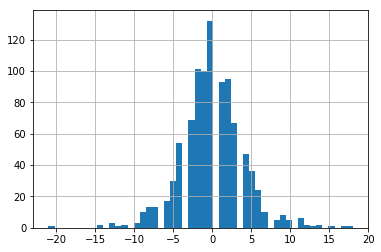

In [14]:
pd.Series((y_test - y_pred)).hist(bins=50)


In [ ]:
pd.Series((y_test - y_pred)/(y_test)).hist(bins=50)


In [ ]:
from sklearn.model_selection import GridSearchCV

gs_inst = GridSearchCV(dtr, param_grid = {'max_depth': [3,5,7,9,20]},cv=10)
gs_inst.fit(X_train, y_train)

# Reduce overfit

In [ ]:
gs_inst.best_estimator_

In [ ]:
y_pred = gs_inst.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

In [ ]:
(np.abs(y_test - y_pred)/(y_test)).mean()

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

dot_diabetes = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_diabetes, feature_names = X_feature_names)
graph = pydot.graph_from_dot_data(dot_diabetes.getvalue())

Image(graph.create_png())

In [ ]:
score

In [ ]:
feature_names = list(X.columns)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(estimator, out_file='tree.dot', feature_names=feature_names)

In [ ]:
ls

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)

## EXAMPLE

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=1)
cross_val_score(regressor, boston.data, boston.target, cv=10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.33, random_state=42)

In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
regressor.score(X_train,y_train)

In [ ]:
regressor.score(X_test,y_test)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# MSE on test data
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, y_pred)
score

In [ ]:
y_pred.size

In [ ]:
boston.target.size

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(boston.target, y_pred, s=20, edgecolor="black",
            c="darkorange", label="data")

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [ ]:
# Plot the results
plt.figure(figsize=(10,5))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()